<a href="https://colab.research.google.com/github/harshi3-code/cnn1-harshi/blob/main/ICP5Harshitha700766967.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ICP4:CNN
Gontu Harshitha
700766967

In [1]:
from google.colab import files
uploaded = files.upload()


Saving image_classification (1) (1) (1).py to image_classification (1) (1) (1).py


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10

# Define image dimensions
image_height = 32  # CIFAR-10 image height
image_width = 32   # CIFAR-10 image width
num_channels = 3   # RGB channels

# Load CIFAR-10 dataset
(train_data, train_labels), (val_data, val_labels) = cifar10.load_data()

# Normalize the data
train_data = train_data.astype('float32') / 255.0
val_data = val_data.astype('float32') / 255.0

# Create the model
model = models.Sequential()

# Convolutional input layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(layers.Dropout(0.2))

# First convolutional block
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block - Reduce the number of convolutional and pooling layers
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Dropout(0.2))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))

# Fully connected layers
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))

# Output layer
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 100  # Adjust epochs as needed
history = model.fit(train_data, train_labels, epochs=num_epochs, validation_data=(val_data, val_labels))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(val_data, val_labels)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - accuracy: 0.2963 - loss: 1.8644 - val_accuracy: 0.5220 - val_loss: 1.3196
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5274 - loss: 1.3166 - val_accuracy: 0.5972 - val_loss: 1.1247
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5847 - loss: 1.1585 - val_accuracy: 0.6287 - val_loss: 1.0429
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6289 - loss: 1.0551 - val_accuracy: 0.6488 - val_loss: 1.0028
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6546 - loss: 0.9673 - val_accuracy: 0.6699 - val_loss: 0.9405
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6830 - loss: 0.9098 - val_accuracy: 0.6891 - val_loss: 0.9037
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6952 - loss: 0.8726 - val_accuracy: 0.7067 - val_loss: 0.8611
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7046 - lo

 This specified architecture to a convolutional neural network (CNN) significantly affects the model performance in several ways. Here are the key impacts of each component:

1. **Convolutional Layers**
*Feature Extraction:*
Convolutional layers are crucial for extracting features from images. By using multiple layers with increasing feature map counts (32, 64, 128), the model can learn to recognize more complex patterns as it goes deeper.
*ReLU Activation:* The rectifier (ReLU) activation function introduces non-linearity, allowing the model to learn more complex functions.

2. **Dropout Layers**
*Regularization:*
 Applying dropout at 20% helps prevent overfitting by randomly dropping out neurons during training. This forces the model to learn more robust features and prevents reliance on any specific neuron.
*Impact on Performance:*
While dropout may initially decrease training accuracy, it often improves validation accuracy and generalization to unseen data.

3. **Max Pooling Layers**
*Dimensionality Reduction:*
Max pooling layers reduce the spatial dimensions of the feature maps, which helps decrease the computational load and the number of parameters. This can lead to faster training times.
*Feature Invariance:*
Pooling helps the model become more invariant to small translations in the input, improving robustness.

4.**Fully Connected Layers**
*Classification Power:*
 Fully connected layers at the end of the network combine features learned by the convolutional layers to make the final classification. Increasing the number of units (1024 and 512) provides the capacity to learn complex relationships.
*Dropout:*
Using dropout in the fully connected layers further reduces overfitting by preventing complex co-adaptations of neurons.

**Performance Implications**
*Training vs. Validation Accuracy:*
we observed that training accuracy improves quickly, but validation accuracy may initially lag behind. If dropout is effective, validation accuracy should catch up as training progresses.
*Overfitting vs. Generalization:*
 Without dropout, the model might achieve high training accuracy but suffer from overfitting, resulting in poor performance on validation/test sets. With dropout, the model typically generalizes better.
*Epochs and Learning Rate:* The learning rate and the number of epochs will affect the performance. More complex architectures may require more careful tuning of these hyperparameters.

 Overall, the specified architecture enhances the model's ability to learn from the data and generalize to unseen samples. By combining multiple convolutional layers, dropout for regularization, and fully connected layers for classification, you should see improved performance, especially on validation and test datasets. Regular monitoring of training and validation metrics during training will help assess the effectiveness of these changes.

Question 2: Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
Predicted classes: [3 8 8 0]
Actual classes: [3 8 8 0]


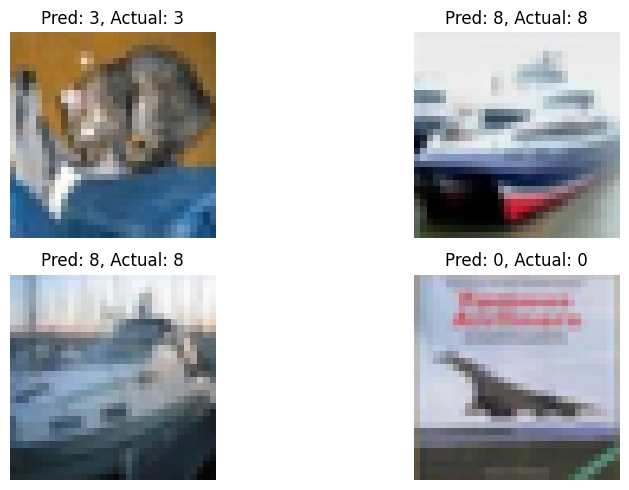

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming the model has already been trained and is available

# Predict the first 4 images from the validation dataset
predictions = model.predict(val_data[:4])

# Get the predicted class indices
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual labels for the first 4 images
actual_classes = val_labels[:4].flatten()  # Flatten to match shape

# Print the predictions and actual labels
print("Predicted classes:", predicted_classes)
print("Actual classes:", actual_classes)

# Visualize the first 4 test images along with their predicted and actual labels
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(val_data[i])
    plt.title(f'Pred: {predicted_classes[i]}, Actual: {actual_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


Question 3: Visualize Loss and Accuracy using the history object

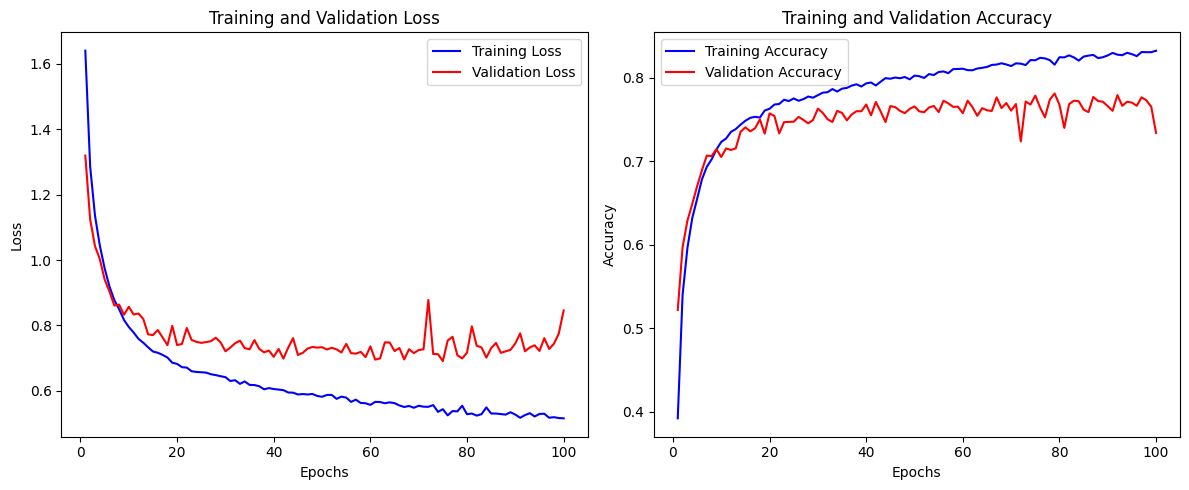

In [3]:
import matplotlib.pyplot as plt

# Extracting loss and accuracy from the history object
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)

# Plotting Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
